In [1]:
import numpy as np
from numpy import log
import matplotlib.pyplot as plt  
#%matplotlib inline
import scipy.optimize as optimize

import scipy.io
import random

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [2]:
def addOnes(X):
    m = X.shape[0]
    ones = np.ones(m)
    onesX = np.column_stack((ones, X))
    return onesX

def subOnes(X):
    return X[:,1:]

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

def initTheta(n, option=0):
    theta= np.zeros(n)
    if option != 0:
        theta = np.random.random(n)
    return theta.reshape(-1,1)

def computeCost(theta, X, y, lamda = 0):
    X = addOnes(X)
    m = X.shape[0]
    theta = theta.reshape(-1,1)
    theta0 = np.copy(theta); theta0[0] = 0
    y = y.reshape(-1,1)
    h = X @ theta
    J = np.sum((h - y) ** 2) + lamda * np.sum(theta0 ** 2)
    J = J / (2. * m)
    return J

def computeCost2(X, y, theta0, theta1):
    m = X.shape[0]
    J = np.zeros((theta0.size, theta1.size))
    for i in range(theta0.size):
        for j in range(theta1.size):
            theta = np.array([[theta0[i]], [theta1[j]]])
            J[i,j] = computeCost(theta, X, y)
    return J

def computeGrad(theta, X, y, lamda = 0):
    X = addOnes(X)
    m = X.shape[0]
    theta = theta.reshape(-1,1)
    theta0 = np.copy(theta); theta0[0] = 0
    y = y.reshape(-1,1)
    grad = np.zeros(len(theta))
    h = X @ theta
    grad = X.T @ (X.dot(theta) - y) + lamda * theta0
    grad = grad / (1.* m)
    grad = grad.ravel()
    return grad

def trainLinReg(X, y, lamda=0):
    initial_theta = initTheta(X.shape[1] + 1)
    theta = optimize.fmin_l_bfgs_b(computeCost, initial_theta, args = (X, y,lamda),fprime=computeGrad)[0]
    return theta

def computeCostLog(theta, X, y, lamda = 0):
    m = X.shape[0]
    theta = theta.reshape(-1,1)
    t0 = np.copy(theta); t0[0] = 0;
    y = y.reshape(-1,1)
    h = sigmoid(X @ theta)
    J =  - y.T @ log(h) - (1- y).T @ log(1-h) + (lamda/2) * t0.T @ t0
    J = (1.0/m) * J
    return J[0,0]

def computeGradLog(theta, X, y, lamda = 0):
    m = X.shape[0]
    theta = theta.reshape(-1,1)
    t0 = np.copy(theta); t0[0] = 0;
    y = y.reshape(-1,1)
    h = sigmoid(X @ theta)
    grad = (1.0/m) * (X.T @ (h - y)) + lamda * t0
    grad = grad.ravel()
    return grad

def gradientDescentLog(X, y, lamda=0, alpha = 0.01, numIter = 1500):
    m = X.shape[0]
    n = X.shape[1]
    theta = np.zeros((n, 1))
    y = y.reshape(-1,1)
    J = np.zeros(numIter)
    for i in range(0, numIter):
        h = sigmoid(X @ theta)
        t0 = np.copy(theta); to[0] = 0;
        cost =  (1.0/m) * (- y.T @ log(h) - (1- y).T @ log(1-h)) + (lamda/2) * t0.T @ t0
        J[i] = cost[0]

        gradient =  (1.0/m) * (X.T @ (h - y)) + lamda * t0
        theta = theta - alpha * gradient
    theta = theta.ravel()
    return (theta, J[-1], J)

def predict(theta, X):
    h = sigmoid(X @ theta)
    threshold = 0.5
    predict = (h > threshold).astype(int)
    return predict

def accuracy(X, y, theta):
    p = predict(theta, X)
    compare = (p.reshape(1,-1) == y.reshape(1,-1)).astype(int)
    accuracy = np.mean(compare)
    return accuracy

def accuracyClassifier(X, y, clf):
    predictions = clf.predict(X)
    accuracy = np.mean(np.equal(yval.ravel(), predictions.ravel())) * 1
    return accuracy

def accuracySVM(X, y,Xval,yval, kernel='rbf', gamma=10, C=1):
    clf = SVC(kernel=kernel, gamma=gamma, C=C)
    clf.fit(X,y)
    predictions = clf.predict(Xval)
    accuracy = np.mean(np.equal(yval.ravel(), predictions.ravel())) * 1
    return accuracy

def learningCurve(X, y, Xval, yval, lamda=0.):
    m = X.shape[0]
    
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    
    for i in range(m):
        X_sub = X[:i+1]
        y_sub = y[:i+1]
        
        theta = trainLinReg(X_sub, y_sub, lamda)
        error_train[i] = computeCost(theta, X_sub, y_sub)
        error_val[i] = computeCost(theta, Xval, yval)
    return (error_train, error_val)

def validationCurve(X, y, Xval, yval, lamda_vec=np.logspace(-2,2,20)):
    n = len(lamda_vec)
    error_train = np.zeros(n)
    error_val = np.zeros(n)
    
    for i in range(n):
        lamda = lamda_vec[i];
        theta = trainLinReg(X, y, lamda)
        error_train[i] = computeCost(theta, X, y, lamda)
        error_val[i] = computeCost(theta, Xval, yval, lamda)
    
    return (error_train, error_val)

def plotData(theta, X, y):
    x_lin = np.linspace(np.min(X) - 1, np.max(X) + 1, 100); x_lin.shape
    plt.scatter(X,y, color='r', marker='x', alpha=.4)
    plt.ylabel('y')
    plt.xlabel('X')
    plt.plot(x_lin, addOnes(x_lin) @ theta)
    plt.show()
    
def plotDataLin(X, y):
    initial_theta = initTheta(X.shape[1] + 1)
    theta = optimize.fmin_l_bfgs_b(computeCost, initial_theta, args = (X, y,),fprime=computeGrad)[0]
    plotData(theta, X, y)

def plotPoly(X, y, p, margin=5, lamda=0):
    X = X.reshape(-1,1)
    poly = PolynomialFeatures(p)
    X_poly = poly.fit_transform(X)
    X_poly = subOnes(X_poly)
    #scaler = StandardScaler().fit(X_poly)
    #X_poly = scaler.transform(X_poly)
    (X_poly,_,_) = featureNormalize(X_poly)
    theta = trainLinReg(X_poly, y, lamda=lamda)
    plt.scatter(X, y, marker='x', color='r')
    x_lin = np.linspace(np.min(X) - margin, np.max(X) + margin, 100).reshape(-1,1)
    x_lin_poly = poly.fit_transform(x_lin)
    x_lin_poly = scaler.transform(subOnes(x_lin_poly))
    plt.plot(x_lin, addOnes(x_lin_poly) @ theta.reshape(-1,1))
    plt.show()
    
def plotLearningCurve(X, y, Xval, yval, lamda=0):
    (error_train, error_val) = learningCurve(X, y, Xval, yval, lamda)
    x = np.arange(len(error_train)) + 1
    plt.plot(x, error_train, x, error_val)
    plt.text( 1,10,error_train[-1])
    plt.text( 1,30, error_val[-1])
    plt.show()

def plot2D(X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='b')
    plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='#4EACC5')
    plt.show()
    
def plot2DLog(theta, X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='b')
    plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='y')
    x_lin = np.linspace(np.min(X[:,0]) , np.max(X[:,0]), 100)
    plt.plot(x_lin, - (x_lin * theta[1] + theta[0])/theta[2])
    plt.show()
    
def plotPolyMesh2DLog(X, y, p, C=1e5):
    poly = PolynomialFeatures(p)
    X_poly = poly.fit_transform(X)

    logreg = linear_model.LogisticRegression(C=C)
    logreg.fit(X_poly,y.ravel())

    theta3 = np.append(logreg.intercept_, logreg.coef_)
    
    pts = 200
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, pts), np.linspace(y_min, y_max, pts))
    Z = logreg.predict( poly.fit_transform(np.c_[xx.ravel(), yy.ravel()])[:,:]  )

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 4))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('1')
    plt.ylabel('2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

def plotPolyMesh2DNN(X, y, layer):
    
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(layer), random_state=1)

    clf.fit(X, y.ravel())
    
    pts = 200
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, pts), np.linspace(y_min, y_max, pts))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 4))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('1')
    plt.ylabel('2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

def plotSVM(X, y, kernel='rbf', gamma=10, C=1):
    clf = SVC(kernel=kernel, gamma=gamma, C=C)
    clf.fit(X, y.ravel()) 
    
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y,edgecolors='k', zorder=10, cmap=plt.cm.Paired)
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.show()
    
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X = (X-mu)/sigma
    return (X, mu, sigma)
    
def scale(X, mu, sigma):
    X = (X-mu)/sigma
    return X

def maxIndex(t):
    col = t[[t.argmax(axis=0)],np.arange(t.shape[1])].argmax()
    row = t[np.arange(t.shape[0]),[t.argmax(axis=1)]].argmax()
    return (row,col)

[('X', (51, 2), 'double'), ('y', (51, 1), 'double')]


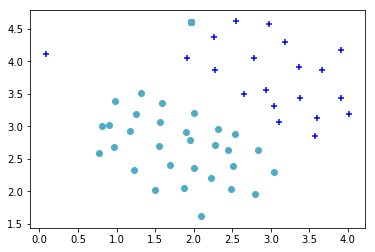

In [3]:
file = r'../data/ex6data1.mat'
print(scipy.io.whosmat(file))
mat = scipy.io.loadmat(file)
X = mat['X']
y = mat['y']
plot2D(X,y)

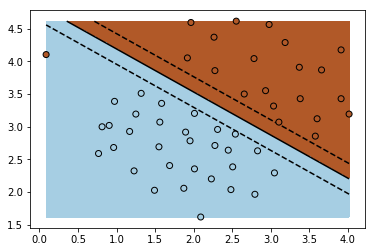

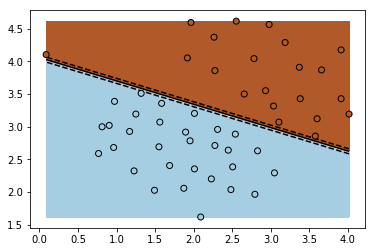

In [4]:
#http://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py



for fig_num,C in enumerate((1,100)):
    clf = SVC(kernel='linear', gamma=10, C=C)
    clf.fit(X, y.ravel()) 
    
    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y,edgecolors='k', zorder=10, cmap=plt.cm.Paired)
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.show()

[('X', (863, 2), 'double'), ('y', (863, 1), 'double')]


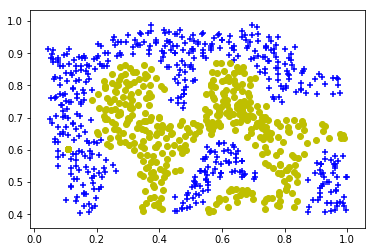

In [166]:
file = r'../data/ex6data2.mat'
print(scipy.io.whosmat(file))
mat = scipy.io.loadmat(file)
X = mat['X']
y = mat['y']
plot2D(X,y)

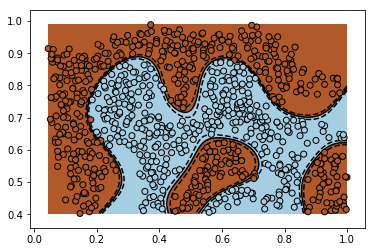

In [167]:
plotSVM(X, y, kernel='rbf', gamma=20, C=200)

In [168]:
file = r'../data/ex6data3.mat'
print(scipy.io.whosmat(file))
mat = scipy.io.loadmat(file)
X = mat['X']
y = mat['y'];  y = y.ravel()
Xval = mat['Xval']
yval = mat['yval'];  yval = yval.ravel()

[('X', (211, 2), 'double'), ('y', (211, 1), 'double'), ('yval', (200, 1), 'double'), ('Xval', (200, 2), 'double')]


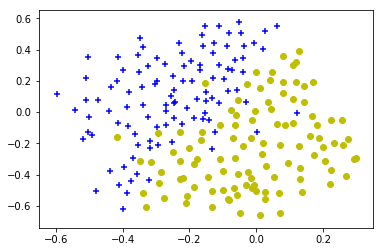

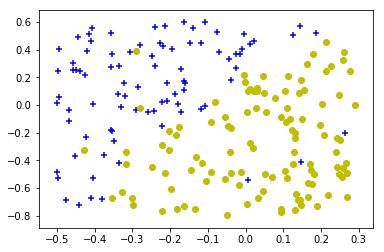

In [169]:
plot2D(X,y)
plot2D(Xval, yval)

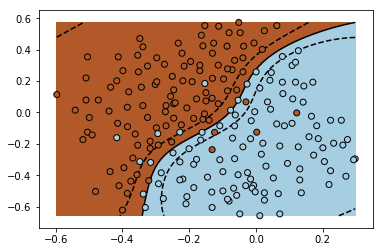

0.94999999999999996

In [175]:
plotSVM(X, y, gamma=10, C=1)
accuracySVM(X, y, Xval, yval,kernel='rbf', gamma=10, C=1)

In [178]:
val = np.logspace(-2,1.5,10)
val

array([  1.00000000e-02,   2.44843675e-02,   5.99484250e-02,
         1.46779927e-01,   3.59381366e-01,   8.79922544e-01,
         2.15443469e+00,   5.27499706e+00,   1.29154967e+01,
         3.16227766e+01])

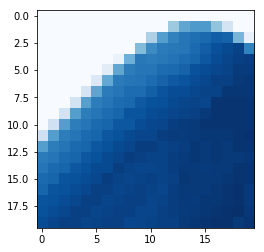

20.6913808111 20.6913808111
[[ 0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.435
   0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.435]
 [ 0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.435
   0.435  0.435  0.635  0.72   0.75   0.75   0.65   0.53   0.435  0.435]
 [ 0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.435
   0.61   0.74   0.8    0.825  0.84   0.855  0.875  0.865  0.685  0.475]
 [ 0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.67
   0.78   0.815  0.82   0.825  0.85   0.875  0.905  0.915  0.93   0.8  ]
 [ 0.435  0.435  0.435  0.435  0.435  0.435  0.435  0.47   0.7    0.82
   0.815  0.82   0.83   0.845  0.86   0.89   0.91   0.925  0.935  0.94 ]
 [ 0.435  0.435  0.435  0.435  0.435  0.435  0.495  0.72   0.81   0.825
   0.825  0.845  0.85   0.865  0.9    0.91   0.92   0.93   0.945  0.945]
 [ 0.435  0.435  0.435  0.435  0.435  0.51   0.715  0.815  0.825  0.83
   0.845  0.865  0.885  0.895  0.

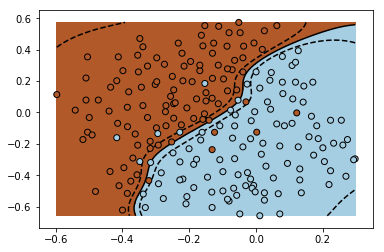

In [177]:
num_val = len(val)
accuracy = np.zeros((num_val,num_val))

for i in range(num_val):
    for j in range(num_val):
        clf = SVC(kernel='rbf', gamma=val[j], C=val[i])
        clf.fit(X, y.ravel())
        #predictions = clf.predict(Xval)
        #accuracy[i,j] = np.mean(np.equal(yval.ravel(), predictions)) * 1
        accuracy[i,j] = accuracyClassifier(Xval, yval, clf)
#plt.imshow(accuracy, cmap='hot', interpolation='nearest')
#plt.cm.Blues
plt.imshow(accuracy, cmap='Blues', interpolation='nearest')
plt.show()
(C_index, gamma_index) = maxIndex(accuracy)

gamma_val = val[gamma_index]
C_val = val[C_index]

print(gamma_val, C_val)
print(accuracy)


print(accuracy[C_index, gamma_index])
plotSVM(X, y, gamma=gamma_val, C=C_val)